In [1]:
# Bonus 1 - Ridge regression using gradient descent

#Uploading the Dataset
# BEGIN_YOUR_CODE
from google.colab import files
uploaded = files.upload()
# END_YOUR_CODE

Saving diamond.csv to diamond.csv


In [3]:
# Reading the Dataset
import io
import pandas as pd
import numpy as np
data=pd.read_csv(io.BytesIO(uploaded['diamond.csv']))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pickle

Weights:
 [0.07516484 0.05787929 0.04949321 0.02774971 0.03540712 0.01853691
 0.00950356 0.03940974 0.00717053 0.00836879]

Error:
 0.012069962657408664


<ipython-input-5-35cd4f22194f>:84: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3, color = 'red', label = 'predicted')


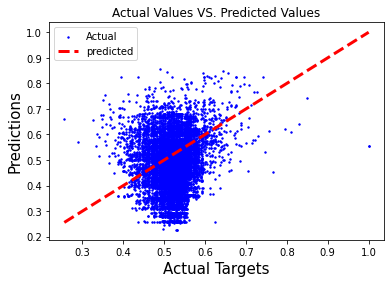

In [5]:

# Read data, encode it, normalize it, divide it into train and test
def prepare_data(filename, target, normalize_columns = None, drop_columns = None, encode_columns = None):
    
    # Load the data and print statistics
    data = pd.read_csv(filename)
    data = data.dropna()
    if drop_columns:
        data = data.drop(columns = drop_columns)
    data_statistics = data.describe()

    # Encode the data
    if encode_columns:
        for column in encode_columns:
            uniques = data[column].unique()
            di = {value:key + 1 for key, value in enumerate(uniques)}
            data[column] = data[column].replace(di)
    
    # Normalize the data
    if normalize_columns:
        for column in normalize_columns:
            data[column] = data[column].apply(lambda x: (x - data[column].min()) / (data[column].max() - data[column].min()))

    # Divide the train, test data
    y_data = data[target]
    X_data = data.drop(columns = [target])
    X_data = np.hstack((np.ones((X_data.shape[0], 1)), X_data))

    # Doesn't shuffle the dataset order
    divider = int(((len(X_data) * 80) / 100) + 1)
    X_train = X_data[:divider]
    X_test = X_data[divider:]
    y_train = y_data[:divider]
    y_test = y_data[divider:]
    
    
    return data_statistics, X_train, X_test, y_train, y_test


class LinearRegression():

    def __init__(self, alpha=0.01, learning_rate=0.001, n_iterations=1000):
        self.weights = None
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        loss = None

        for i in range(self.n_iterations):
            y_pred = X.dot(self.weights)
            errors = y - y_pred
            l2_norm = self.alpha * np.sum(self.weights ** 2)
            loss = np.mean(errors ** 2) + l2_norm
            gradients = (-2 / n_samples) * X.T.dot(errors) + (2 * self.alpha * self.weights)
            self.weights -= self.learning_rate * gradients
        
        return self.weights, loss
    
    def predict(self, X):
        y_pred = X.dot(self.weights)
        
        return y_pred

data_statistics, X_train, X_test, y_train, y_test = prepare_data(
    filename = 'diamond.csv',
    target = 'depth',
    normalize_columns = ['depth', 'table', 'price', 'x', 'y', 'z'],
    encode_columns = ['cut', 'color', 'clarity']
)
# Initialize model with learning rate and no.of iterations
linear_regression = LinearRegression()

# Fit the data
weights, error = linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)
print('Weights:\n', weights)
print('\nError:\n', error)

plt.scatter(y_test, y_pred, color = 'blue', label = 'Actual', s = 2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3, color = 'red', label = 'predicted')
plt.xlabel('Actual Targets', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Actual Values VS. Predicted Values')
plt.legend()
plt.show()

In [6]:
import pickle
with open( "Bonus 1.p", "ba+" ) as fp:
    pickle.dump(weights, fp)

In [7]:
pickle.load(open( "Bonus 1.p", "rb" ))

array([0.07516484, 0.05787929, 0.04949321, 0.02774971, 0.03540712,
       0.01853691, 0.00950356, 0.03940974, 0.00717053, 0.00836879])